In [4]:
import os
import pandas as pd
from delphes_reader.root_analysis import make_histograms

In [13]:
csv_files=[]
folder_out="Leptoquarks_searches/03_delphes_analysis/csv_files"
for file in next(os.walk(folder_out))[2]:
    if "hadronic_(al)one_jet.csv" in file:
        csv_files+=[file]
    else:
        pass 
csv_files.sort()
csv_files

['Cutflow_b_tau_tau_hadronic_(al)one_jet.csv',
 'LQ_LQ_0250_b_tau_tau_hadronic_(al)one_jet.csv',
 'LQ_LQ_0500_b_tau_tau_hadronic_(al)one_jet.csv',
 'LQ_LQ_0750_b_tau_tau_hadronic_(al)one_jet.csv',
 'LQ_LQ_1000_b_tau_tau_hadronic_(al)one_jet.csv',
 'LQ_LQ_1250_b_tau_tau_hadronic_(al)one_jet.csv',
 'LQ_LQ_1500_b_tau_tau_hadronic_(al)one_jet.csv',
 'LQ_LQ_1750_b_tau_tau_hadronic_(al)one_jet.csv',
 'LQ_LQ_2000_b_tau_tau_hadronic_(al)one_jet.csv',
 'LQ_LQ_2250_b_tau_tau_hadronic_(al)one_jet.csv',
 'LQ_LQ_2500_b_tau_tau_hadronic_(al)one_jet.csv',
 'Tau_LQ_0250_b_tau_tau_hadronic_(al)one_jet.csv',
 'Tau_LQ_0500_b_tau_tau_hadronic_(al)one_jet.csv',
 'Tau_LQ_0750_b_tau_tau_hadronic_(al)one_jet.csv',
 'Tau_LQ_1000_b_tau_tau_hadronic_(al)one_jet.csv',
 'Tau_LQ_1250_b_tau_tau_hadronic_(al)one_jet.csv',
 'Tau_LQ_1500_b_tau_tau_hadronic_(al)one_jet.csv',
 'Tau_LQ_1750_b_tau_tau_hadronic_(al)one_jet.csv',
 'Tau_LQ_2000_b_tau_tau_hadronic_(al)one_jet.csv',
 'Tau_LQ_2250_b_tau_tau_hadronic_(al)one_jet.

In [14]:
def read_csv(file):
    path_to_file=os.path.join(folder_out,file)
    df=pd.read_csv(path_to_file)
    return file.removesuffix('_hadronic_(al)one_jet.csv'), df

In [15]:
data_dict=dict(map(read_csv,csv_files))
for signal in data_dict:
    print( signal+":" , len(data_dict[signal]) )

Cutflow_b_tau_tau: 6
LQ_LQ_0250_b_tau_tau: 15601
LQ_LQ_0500_b_tau_tau: 13290
LQ_LQ_0750_b_tau_tau: 12485
LQ_LQ_1000_b_tau_tau: 12360
LQ_LQ_1250_b_tau_tau: 12118
LQ_LQ_1500_b_tau_tau: 11855
LQ_LQ_1750_b_tau_tau: 11466
LQ_LQ_2000_b_tau_tau: 11479
LQ_LQ_2250_b_tau_tau: 11316
LQ_LQ_2500_b_tau_tau: 10969
Tau_LQ_0250_b_tau_tau: 15105
Tau_LQ_0500_b_tau_tau: 16545
Tau_LQ_0750_b_tau_tau: 17305
Tau_LQ_1000_b_tau_tau: 17767
Tau_LQ_1250_b_tau_tau: 17896
Tau_LQ_1500_b_tau_tau: 18053
Tau_LQ_1750_b_tau_tau: 18152
Tau_LQ_2000_b_tau_tau: 18173
Tau_LQ_2250_b_tau_tau: 18149
Tau_LQ_2500_b_tau_tau: 18075
Tau_LQ_Merged_0250_b_tau_tau: 18307
Tau_LQ_Merged_0500_b_tau_tau: 19270
Tau_LQ_Merged_0750_b_tau_tau: 19738
Tau_LQ_Merged_1000_b_tau_tau: 20016
Tau_LQ_Merged_1250_b_tau_tau: 20102
Tau_LQ_Merged_1500_b_tau_tau: 20024
Tau_LQ_Merged_1750_b_tau_tau: 20106
Tau_LQ_Merged_2000_b_tau_tau: 19780
Tau_LQ_Merged_2250_b_tau_tau: 19840
Tau_LQ_Merged_2500_b_tau_tau: 19693
stop_b_tau_tau: 4363
ttbar_b_tau_tau: 33481
w_jet

In [16]:
make_histograms(data_dict["LQ_LQ_0500"],1.0)

KeyError: 'LQ_LQ_0500'

In [20]:
import ROOT
c=ROOT.TCanvas("c1","",800,600)
h=make_histograms(data_dict["LQ_LQ_1500_b_tau_tau"],1.0)["light_jets_multiplicity"]
h.Draw("HIST")
c.Draw()

ZeroDivisionError: float division by zero

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


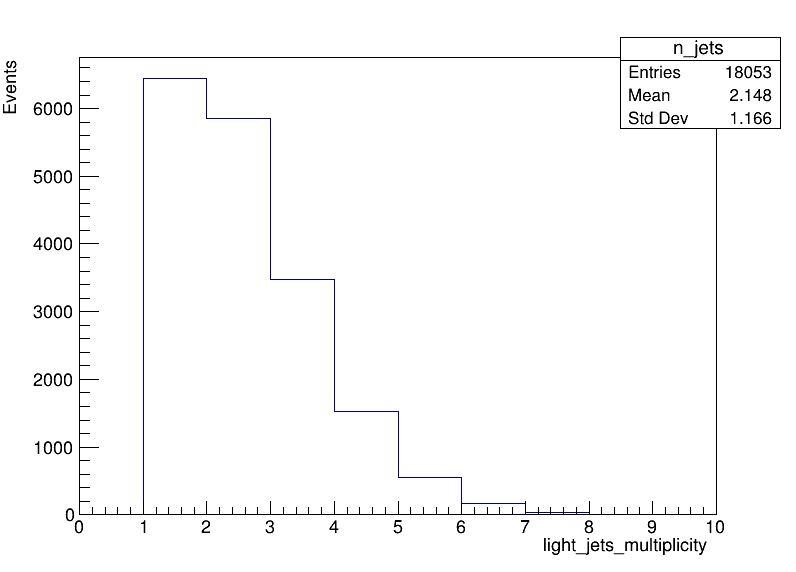

In [25]:
h=ROOT.TH1F(
            "n_jets",";light_jets_multiplicity; Events",
            10,0,10
        )
df=data_dict["Tau_LQ_1500_b_tau_tau"]
for value in df["light_jets_multiplicity"]:
    h.Fill(value)
h.Draw("HIST")
c.Draw()